Width in pixels: 23
Distance to target: 158.6
Turn this angle to point at the target: -0.5104620773461742


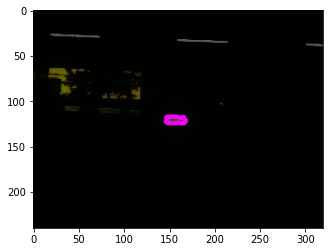

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
FOCAL_LENGTH = 280.6 #cm/pixels
REAL_HEIGHT = 5 #cm
REAL_WIDTH = 13 #cm
hsvLow = np.array([45, 80, 80])
hsvHigh = np.array([75, 255, 255])
PIXELS_WIDE = 320
PIXELS_HIGH = 240
def find_largest_wide_contour(contours):
    max = 0
    for i in range(1,len(contours)):
          x,y,width,height = cv2.boundingRect(contours[i])
          if cv2.contourArea(contours[i]) > cv2.contourArea(contours[max]) and width/height>1.5 and width/height<2.5:
            max = i
    return contours[max]
#using height in dist measurement calculation
def getTargetData(image):
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(hsv,hsvLow,hsvHigh)
  contours, hiearchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  if(len(contours) > 0):
    contour = find_largest_wide_contour(contours)
    plt.imshow(cv2.drawContours(image,[contour],-1,(255,0,255), 3))
    x,y,width,height = cv2.boundingRect(contour)
    distance = REAL_HEIGHT * FOCAL_LENGTH / height
    return distance, x+width/2, y+height/2
  return None
#using width in dist measurement calculation
def getTargetData2(image):
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(hsv,hsvLow,hsvHigh)
  contours, hiearchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  if(len(contours) > 0):
    contour = find_largest_wide_contour(contours)
    plt.imshow(cv2.drawContours(image,[contour],-1,(255,0,255), 3))
    x,y,width,height = cv2.boundingRect(contour)
    print("Width in pixels: " + str(width))
    distance = REAL_WIDTH * FOCAL_LENGTH / width
    return distance, x+width/2, y+height/2
  return None
  
def getTurnAngle(x,y, centerX, centerY):
  dx = x-centerX
  dz = FOCAL_LENGTH
  return np.degrees(np.arctan(dx/dz))

def runPipeline(image, llrobot):
  distance,x,y = getTargetData2(image)
  angle = getTurnAngle(x,y, PIXELS_WIDE/2, PIXELS_HIGH/2)
  print('Distance to target: '+ str(distance))
  print('Turn this angle to point at the target: '+str(angle))
  low_threshold = np.array([240, 0, 0])
  high_threshold = np.array([255, 255, 255])
  binary = np.all((image > low_threshold) * (image <= high_threshold), axis=2)
  mask = np.where(binary, 255, 0)
  output_image = image.copy()
  output_image[mask > 0] = [255,255,255]
  return ([[[0,0]],[[0,100]],[[100,0]],[[100,100]]], output_image, {})
done = runPipeline(cv2.imread('79.jpg'), None)
